# Newton's Method

Natasha Watkins

In [1]:
import numpy as np
from scipy.optimize import newton
import matplotlib.pyplot as plt
from scipy.linalg import norm

## Problem 1

In [2]:
def newton_1(f, f_prime, x0, tol=1e-5, maxiter=15):
    i = 0
    diff = 1e3
    x = x0
    while diff > tol and i < maxiter:
        x_new = x - f(x) / f_prime(x)
        diff = np.abs(x_new - x)
        x = x_new
        i += 1
    if i < maxiter:
        print(f'Converged in {i} iterations.')
    else:
        print('Did not converge')
    return x, i < maxiter, i

In [3]:
f = lambda x: np.exp(x) - 2
f_prime = lambda x: np.exp(x)

In [4]:
newton_1(f, f_prime, 1)

Converged in 4 iterations.


(0.6931471805600254, True, 4)

In [5]:
f(newton_1(f, f_prime, 1)[0])

Converged in 4 iterations.


1.603162047558726e-13

In [6]:
g = lambda x: x**4 - 3
g_prime = lambda x: 4 * x**3

In [7]:
newton_1(g, g_prime, 1)

Converged in 5 iterations.


(1.3160740129543826, True, 5)

In [8]:
newton(g, 1, g_prime)

1.3160740129524924

## Problem 2

In [9]:
def find_r(N1, N2, P1, P2):
    f = lambda r: P1 * ((1 + r)**N1 - 1) - P2 * (1 - (1 + r)**(-N2))
    f_prime = lambda r: P1 * N1 * (1 + r)**(N1 - 1) - P2 * N2 * (1 + r)**(-N2 - 1)
    return newton_1(f, f_prime, 1, maxiter=50)

In [10]:
find_r(30, 20, 2000, 8000)

Converged in 24 iterations.


(0.03877843204285935, True, 24)

## Problem 3

In [11]:
def newton_b(f, f_prime, x0, α, tol=1e-5, maxiter=15, print_flag=True):
    i = 0
    diff = 1e3
    x = x0
    
    while diff > tol and i < maxiter:
        x_new = x - α * f(x) / f_prime(x)
        diff = np.abs(x_new - x)
        x = x_new
        i += 1
        
    if print_flag:
        if i < maxiter:
            print(f'Converged in {i} iterations.')
        else:
            print('Did not converge')
    return x, i < maxiter, i

In [12]:
f = lambda x: np.sign(x) * np.power(np.abs(x), 1/3)
f_prime = lambda x: 1 / 3 * np.power(np.abs(x), -2/3)

In [13]:
newton_b(f, f_prime, 0.01, 1, maxiter=50)

Did not converge


(11258999068425.709, False, 50)

In [14]:
newton_b(f, f_prime, 0.01, 0.4, maxiter=50)

Converged in 6 iterations.


(6.400000000000134e-07, True, 6)

## Problem 4

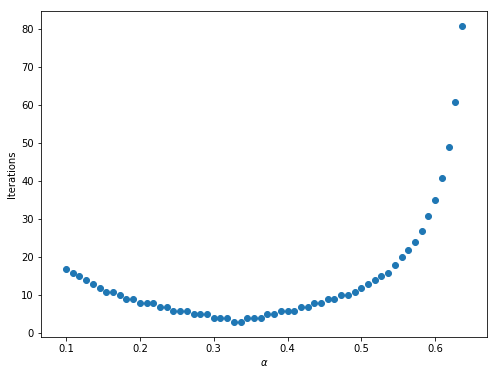

In [16]:
n = 100
α_grid = np.linspace(1e-1, 1, n)
points = np.zeros((n, 2))

for i, α in enumerate(α_grid):
    result = newton_b(f, f_prime, 0.01, α, maxiter=100, 
                      print_flag=False)
    if result[1]:
        points[i, :] = (α, result[2])
    else:
        points[i, :] = np.nan * np.ones(2)

plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1])
plt.xlabel(r'$\alpha$')
plt.ylabel('Iterations')
plt.show()

## Problem 5

In [17]:
def newton_vec(f, f_prime, x0, α, tol=1e-5, maxiter=15, print_flag=True):
    
    i = 0
    diff = 1e3
    x = x0
    
    if np.isscalar(x0):
        while diff > tol and i < maxiter:
            x_new = x - α * f(x) / f_prime(x)
            diff = np.abs(x_new - x)
            x = x_new
            i += 1
    else:
        while diff > tol and i < maxiter:
            y = np.linalg.solve(f_prime(x), f(x))
            x_new = x - α * y
            diff = norm(x_new - x, np.inf)
            x = x_new
            i += 1
        
    if print_flag:
        if i < maxiter:
            print(f'Converged in {i} iterations.')
        else:
            print('Did not converge')
    return x, i < maxiter, i

In [18]:
newton_vec(f, f_prime, 1, 0.4)

Converged in 9 iterations.


(-5.120000000000109e-07, True, 9)

In [19]:
def find_r(N1, N2, P1, P2):
    f = lambda r: P1 * ((1 + r)**N1 - 1) - P2 * (1 - (1 + r)**(-N2))
    f_prime = lambda r: P1 * N1 * (1 + r)**(N1 - 1) - P2 * N2 * (1 + r)**(-N2 - 1)
    return newton_vec(f, f_prime, 1, 1, maxiter=50)

In [20]:
find_r(30, 20, 2000, 8000)

Converged in 24 iterations.


(0.03877843204285935, True, 24)

In [21]:
def f(xvec):
    x, y = xvec
    return np.array([x**2, x**3 - y])

In [22]:
def Df(xvec):
    x, y = xvec
    return np.array([[2 * x , 0],
                     [3 * x**2, -1]])

In [23]:
newton_vec(f, Df, [1.5, 1.5], α=0.5, maxiter=100)

Converged in 38 iterations.


(array([ 2.68175604e-05, -3.37714855e-11]), True, 38)

## Problem 6

In [24]:
γ = 5
δ = 1

def h(vec):
    x, y = vec
    return np.array([γ * x * y - x * (1 + y),
                     -x * y + (δ - y) * (1 + y)])

def Dh(vec):
    x, y = vec
    return np.array([[γ * y - (1 + y), γ * x - x],
                     [-y, -x + δ - 1 - 2 * y]])

def init_point():
    for x in np.linspace(-1/4, 0):
        for y in np.linspace(0, 1/4):
            result1 = newton_vec(h, Dh, [x, y], α=1, 
                                maxiter=100, print_flag=False)
            if np.allclose(result1[0], [0, 1]) or np.allclose(result1[0], [0, -1]):
                result2 = newton_vec(h, Dh, [x, y], α=0.55, maxiter=100, print_flag=False)
                if np.allclose(result2[0], [3.75, 0.25]):
                    return np.array([x, y])
                else:
                    pass
            else:
                pass
    print('No initial points found')
    return False

In [26]:
xvec = init_point()
xvec

array([-0.25      ,  0.20408163])

In [27]:
newton_vec(h, Dh, xvec, 0.55, maxiter=100)

Converged in 18 iterations.


(array([3.75000695, 0.25000218]), True, 18)

In [29]:
newton_vec(h, Dh, xvec, 1, maxiter=100)

Converged in 8 iterations.


(array([-1.51741734e-19, -1.00000000e+00]), True, 8)

## Problem 7

In [31]:
def basins(f, f_prime, zeros, r_min, r_max, 
           i_min, i_max, res, iters, tol=1e-5):
    
    x_real = np.linspace(r_min, r_max, res)
    x_imag = np.linspace(i_min, i_max, res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j * X_imag
    
    i = 0
    diff = 1e3
    
    while diff > tol and i < iters:
        X_new = X_0 - f(X_0) / f_prime(X_0)
        diff = norm(X_new - X_0)
        X_0 = X_new
        i += 1
        
    Y = np.zeros_like(X_0, dtype=int)
    diffs = 1e3 * np.ones_like(X_0, dtype=int)
        
    for r_id, R in enumerate(zeros):
        diffs_new = np.abs(X_0 - R)
        Y[diffs_new < diffs] = r_id
        diffs = diffs_new

    plt.pcolormesh(X_real, X_imag, Y, cmap='brg')
    plt.show()

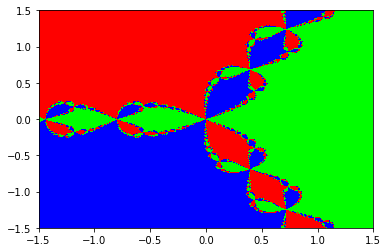

In [32]:
f = lambda x: x**3 - 1
f_prime = lambda x: 3 * x**2
zeros = np.array([-1/2 - np.sqrt(3) / 2 * 1j, 
                  -1/2 + np.sqrt(3) / 2 * 1j, 1])

basins(f, f_prime, zeros, -1.5, 1.5, -1.5, 1.5, 500, 50)

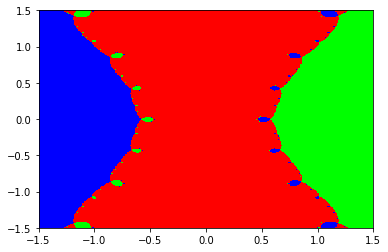

In [33]:
g = lambda x: x**3 - x
g_prime = lambda x: 3 * x**2 - 1
zeros = np.array([-1, 0, 1])
basins(g, g_prime, zeros, -1.5, 1.5, -1.5, 1.5, 500, 50)